# Stroke Prediction

## Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import tree
from IPython.display import Image, display
import matplotlib.pyplot as plt,pydotplus
import seaborn as sns

## Reading CSV

In [45]:
ds = pd.read_csv('healthcare-dataset-stroke-data.csv')
ds

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [46]:
ds.shape

(5110, 12)

In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Unique Value

In [48]:
uniqueValues = ds.nunique()
print(uniqueValues)

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [49]:
col = ds.columns.values.tolist()

for col in ds:
    print(ds[col].unique())
    

[ 9046 51676 31112 ... 19723 37544 44679]
['Male' 'Female' 'Other']
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4

# Cleaning Data

## Checking Duplicate Data

In [50]:
duplicate = ds[ds.duplicated('id')]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

## Checking Null Value

In [51]:
ds.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [52]:
#total missing data in all column
ds.isnull().sum().sum()

201

In [53]:
ds.drop("id", axis = 1, inplace = True) # drop id column

## Replace Null Value

In [54]:
from sklearn.impute import SimpleImputer #filling the  missing values in bmi column with the median of bmi values

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

ds['bmi'] = imp_median.fit_transform(ds['bmi'].values.reshape(-1,1)) 

ds.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Checking Outliers

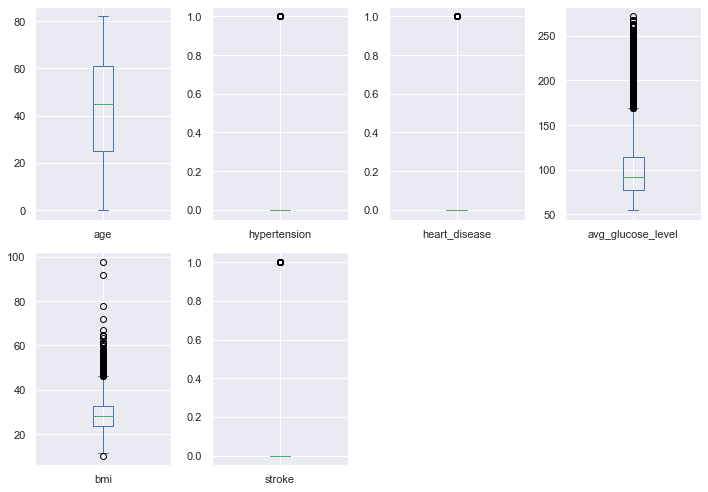

In [55]:
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
ds.plot(kind='box', subplots=True, layout=(2,4))
plt.show()

## Remove Outliers

In [56]:
ds.gender.value_counts() # counting the values of each level from the gender column.


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [57]:
ds = ds[ds.gender != 'Other']
ds.gender.value_counts() 

Female    2994
Male      2115
Name: gender, dtype: int64

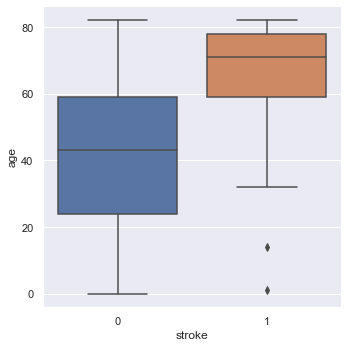

In [58]:
sns.catplot(data=ds, x="stroke", y="age", kind="box")

In [59]:
indexAge = ds[((ds['age'] < 20) & (ds['stroke'] == 1)) ].index  #find the indexes of outliers
ds.drop(indexAge , inplace=True) # drop the outliers

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/3993683263.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



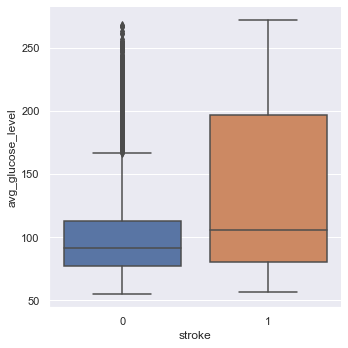

In [60]:
sns.catplot(data=ds, x="stroke", y="avg_glucose_level", kind="box")

In [61]:
indexAge = ds[((ds['avg_glucose_level'] > 220) & (ds['stroke'] == 0)) ].index
ds.drop(indexAge , inplace=True)

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/2189187933.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



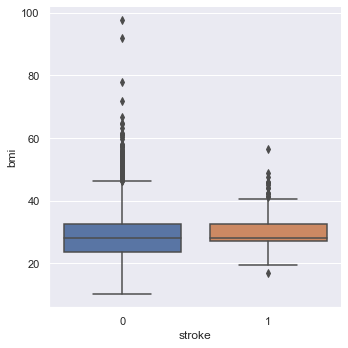

In [62]:
sns.catplot(data=ds, x="stroke", y="bmi", kind="box")

In [63]:
indexAge = ds[((ds['bmi'] > 50) & (ds['stroke'] == 0)) ].index
ds.drop(indexAge , inplace=True)

indexAge = ds[((ds['bmi'] > 40) & (ds['stroke'] == 1)) ].index
ds.drop(indexAge , inplace=True)

indexAge = ds[((ds['bmi'] < 19) & (ds['stroke'] == 1)) ].index
indexAge.shape
ds.drop(indexAge , inplace=True)

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/1089580041.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/1089580041.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/1089580041.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



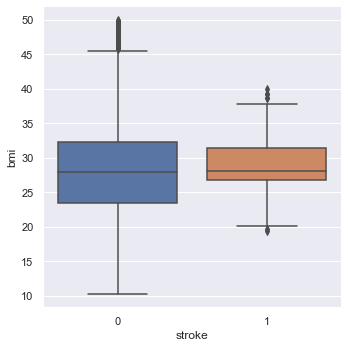

In [64]:
sns.catplot(data=ds, x="stroke", y="bmi", kind="box")#bmi above 50 is dropped

## Structure and shape of dataset

In [65]:
ds.shape

(4838, 11)

# Exploratory Data Analysis (EDA)

In [66]:
df = ds
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21  28.1     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75  28.1     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[4838 rows x 11 columns]

In [67]:
df["hypertension"] = np.where(df["hypertension"] == 0, "no hypertension", "has hypertension")
df["heart_disease"] = np.where(df["heart_disease"] == 0, "no heart disease", "has heart disease")
df

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/3641269633.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/3641269633.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gender   age      hypertension      heart_disease ever_married  \
0       Male  67.0   no hypertension  has heart disease          Yes   
1     Female  61.0   no hypertension   no heart disease          Yes   
2       Male  80.0   no hypertension  has heart disease          Yes   
3     Female  49.0   no hypertension   no heart disease          Yes   
4     Female  79.0  has hypertension   no heart disease          Yes   
...      ...   ...               ...                ...          ...   
5105  Female  80.0  has hypertension   no heart disease          Yes   
5106  Female  81.0   no hypertension   no heart disease          Yes   
5107  Female  35.0   no hypertension   no heart disease          Yes   
5108    Male  51.0   no hypertension   no heart disease          Yes   
5109  Female  44.0   no hypertension   no heart disease          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.1     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.1     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4838 rows x 11 columns]

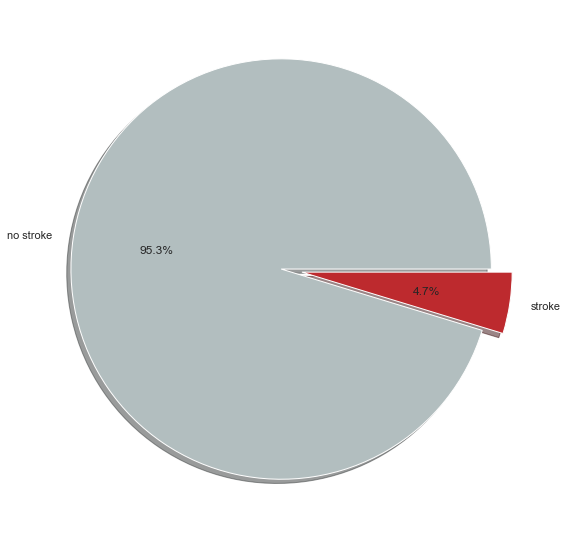

0    4610
1     228
Name: stroke, dtype: int64

In [68]:
pie_df=pd.DataFrame(df.groupby('stroke')['stroke'].count()) #Checking the percentages of stroke and no-stroke 
plt.figure(figsize=(8,8))
pie_df
colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=1,explode = (0, 0.1),shadow=True)
plt.show()
df.stroke.value_counts()

## Gender

   index  gender  stroke
0      0  Female     127
1      1    Male     101


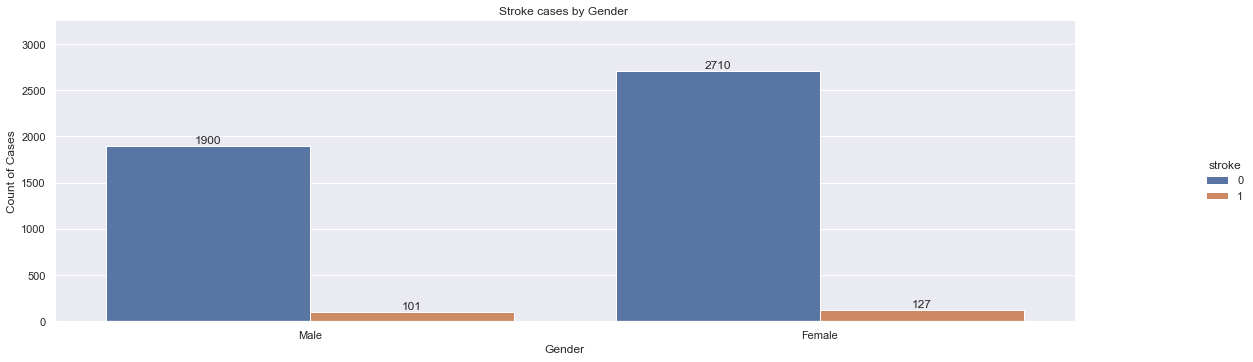

In [69]:
d1=df.groupby('gender',as_index=False).agg({"stroke": 'sum'})
d1.reset_index(inplace=True)
print(d1)

g = sns.catplot(data=df, kind='count', x='gender',hue='stroke')
g.set(title='Stroke cases by Gender ', xlabel='Gender', ylabel='Count of Cases')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

for ax in g.axes.ravel():
    
    # add data labels
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## Age and Stroke

In [70]:
#  Box plots for Age and Stroke

stroke_data = df[df['stroke'] == 1]
no_stroke_data = df[df['stroke'] == 0]

fig=make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=stroke_data['age'], name='Stroke'),row=1,col=1)
fig.add_trace(go.Box(y=no_stroke_data['age'], name='No Stroke'),row=1,col=1)

fig.update_layout(title_text='<b>Age & Stroke')



## Glucose Level and Stroke

In [71]:
#  Box plots for Age and Stroke

stroke_data = df[df['stroke'] == 1]
no_stroke_data = df[df['stroke'] == 0]

fig=make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=stroke_data['avg_glucose_level'], name='Stroke'),row=1,col=1)
fig.add_trace(go.Box(y=no_stroke_data['avg_glucose_level'], name='No Stroke'),row=1,col=1)

fig.update_layout(title_text='<b>Glucose level & Stroke')

## Hypertension

   index      hypertension  stroke
0      0  has hypertension      60
1      1   no hypertension     168


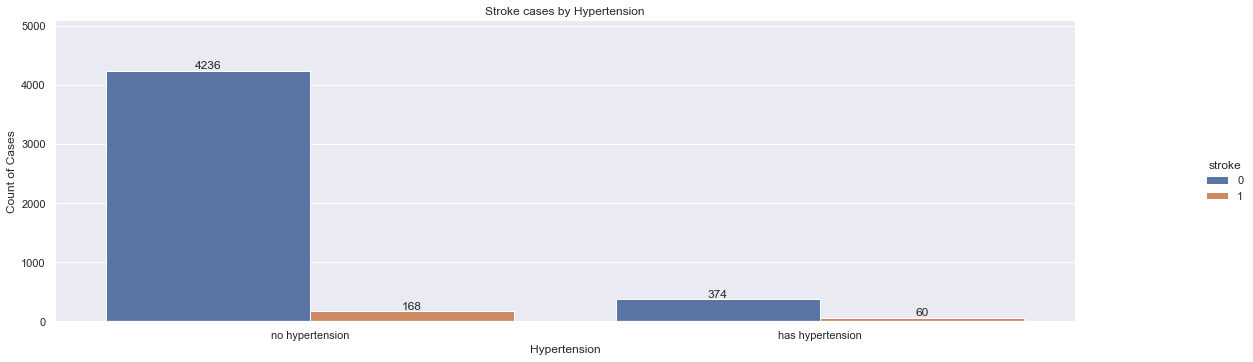

In [72]:
d2=df.groupby('hypertension',as_index=False).agg({"stroke": 'sum'})
d2.reset_index(inplace=True)
print(d2)

g = sns.catplot(data=df, kind='count', x='hypertension',hue='stroke')
g.set(title='Stroke cases by Hypertension', xlabel='Hypertension', ylabel='Count of Cases')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

for ax in g.axes.ravel():
    
    # add data labels
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## Heart Disease

   index      heart_disease  stroke
0      0  has heart disease      46
1      1   no heart disease     182


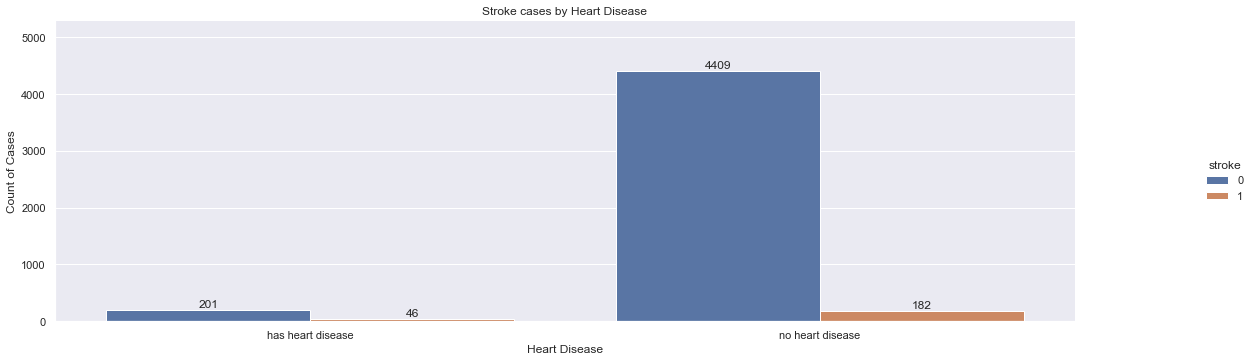

In [73]:
d3=df.groupby('heart_disease',as_index=False).agg({"stroke": 'sum'})
d3.reset_index(inplace=True)
print(d3)

g = sns.catplot(data=df, kind='count', x='heart_disease',hue='stroke')
g.set(title='Stroke cases by Heart Disease', xlabel='Heart Disease', ylabel='Count of Cases')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

for ax in g.axes.ravel():
    
    # add data labels
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## Ever Married

   index ever_married  stroke
0      0           No      26
1      1          Yes     202


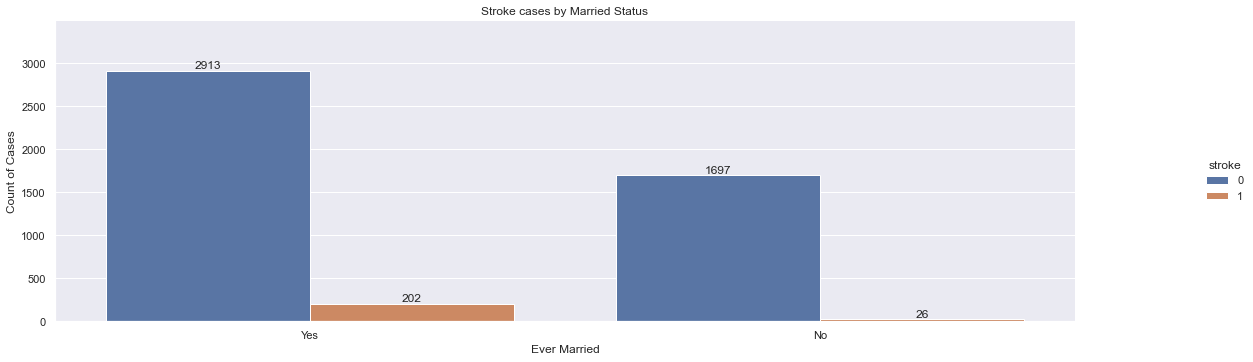

In [74]:
d4=df.groupby('ever_married',as_index=False).agg({"stroke": 'sum'})
d4.reset_index(inplace=True)
print(d4)

g = sns.catplot(data=df, kind='count', x='ever_married',hue='stroke')
g.set(title='Stroke cases by Married Status', xlabel='Ever Married', ylabel='Count of Cases')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

for ax in g.axes.ravel():
    
    # add data labels
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## Work Type

   index      work_type  stroke
0      0       Govt_job      31
1      1   Never_worked       0
2      2        Private     136
3      3  Self-employed      61
4      4       children       0


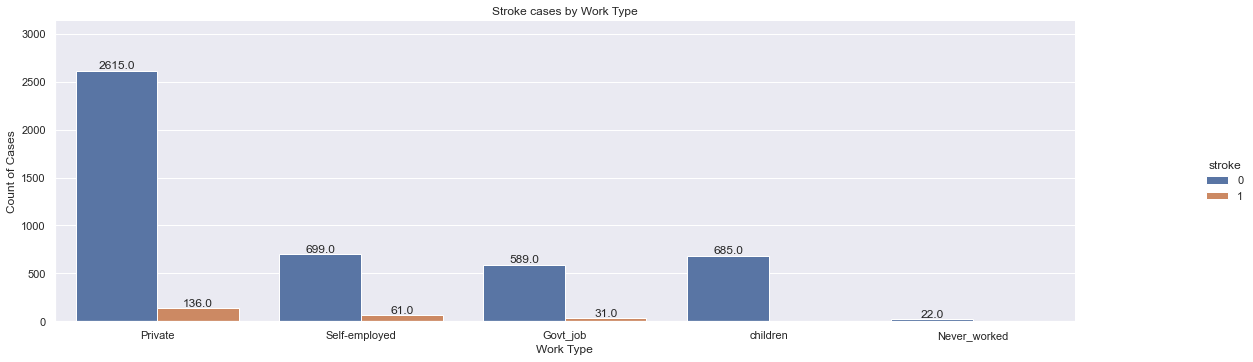

In [75]:
d5 = df.groupby('work_type',as_index=False).agg({"stroke": 'sum'})
d5.reset_index(inplace=True)
print(d5)

g = sns.catplot(data=df, kind='count', x='work_type',hue='stroke')
g.set(title='Stroke cases by Work Type', xlabel='Work Type', ylabel='Count of Cases')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

for ax in g.axes.ravel():
    
    # add data labels
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## Residence Type

   index Residence_type  stroke
0      0          Rural     106
1      1          Urban     122


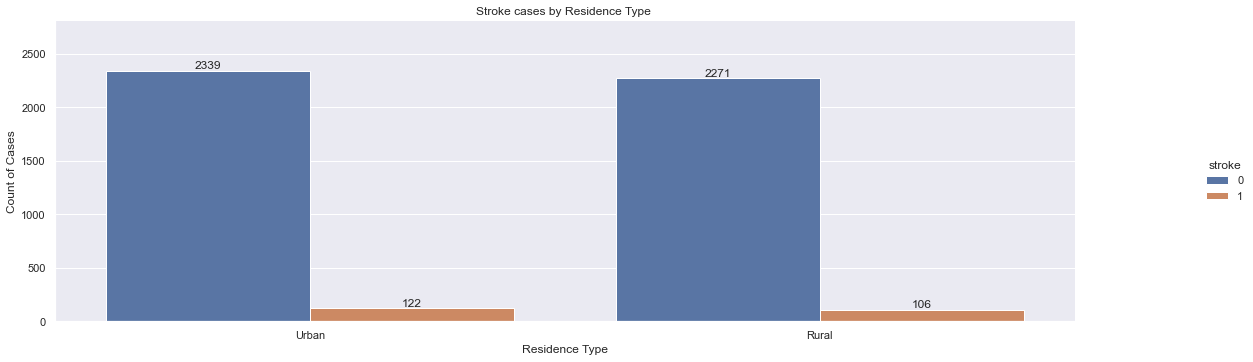

In [76]:
d6 = df.groupby('Residence_type',as_index=False).agg({"stroke": 'sum'})
d6.reset_index(inplace=True)
print(d6)

g = sns.catplot(data=ds, kind='count', x='Residence_type',hue='stroke')
g.set(title='Stroke cases by Residence Type ', xlabel='Residence Type', ylabel='Count of Cases')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

for ax in g.axes.ravel():
    
    # add data labels
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## BMI and Stroke

In [77]:
#  Box plots for Age and Stroke

stroke_data = df[df['stroke'] == 1]
no_stroke_data = df[df['stroke'] == 0]

fig=make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=stroke_data['bmi'], name='Stroke'),row=1,col=1)
fig.add_trace(go.Box(y=no_stroke_data['bmi'], name='No Stroke'),row=1,col=1)

fig.update_layout(title_text='<b>BMI & Stroke')

## Smoking Status

   index   smoking_status  stroke
0      0          Unknown      43
1      1  formerly smoked      63
2      2     never smoked      82
3      3           smokes      40


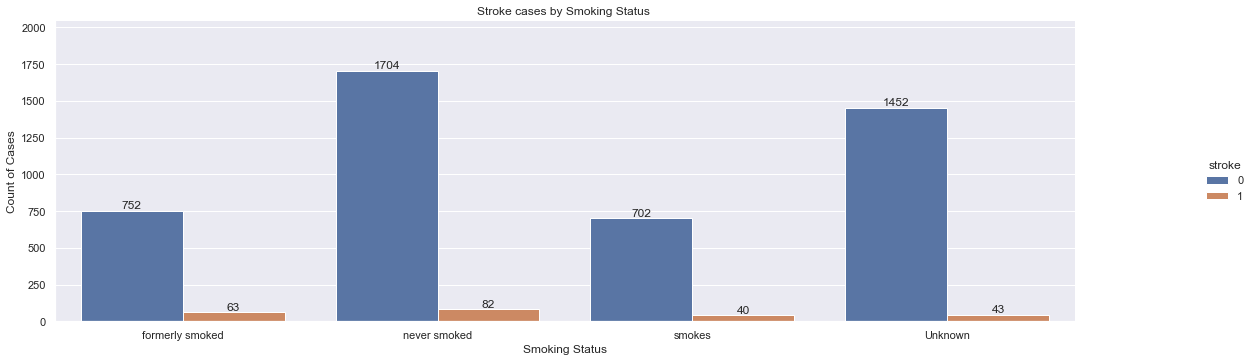

In [78]:
d7 = df.groupby('smoking_status',as_index=False).agg({"stroke": 'sum'})
d7.reset_index(inplace=True)
print(d7)

g = sns.catplot(data=df, kind='count', x='smoking_status',hue='stroke')
g.set(title='Stroke cases by Smoking Status ', xlabel='Smoking Status', ylabel='Count of Cases')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

for ax in g.axes.ravel():
    
    # add data labels
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## Measure of Central Tendency and Dispersion

In [79]:
ds.describe().transpose()

count        mean        std    min      25%   50%  \
age                4838.0   42.469136  22.694499   0.08  24.0000  44.0   
avg_glucose_level  4838.0  101.096263  38.169299  55.12  76.5725  90.6   
bmi                4838.0   28.231749   6.778789  10.30  23.5000  28.1   
stroke             4838.0    0.047127   0.211932   0.00   0.0000   0.0   

                       75%     max  
age                 60.000   82.00  
avg_glucose_level  111.035  271.74  
bmi                 32.300   49.90  
stroke               0.000    1.00

## Correlation

In [80]:
np.round(ds.corr(),2)

age  avg_glucose_level   bmi  stroke
age                1.00               0.18  0.36    0.26
avg_glucose_level  0.18               1.00  0.12    0.17
bmi                0.36               0.12  1.00    0.03
stroke             0.26               0.17  0.03    1.00

<AxesSubplot:>

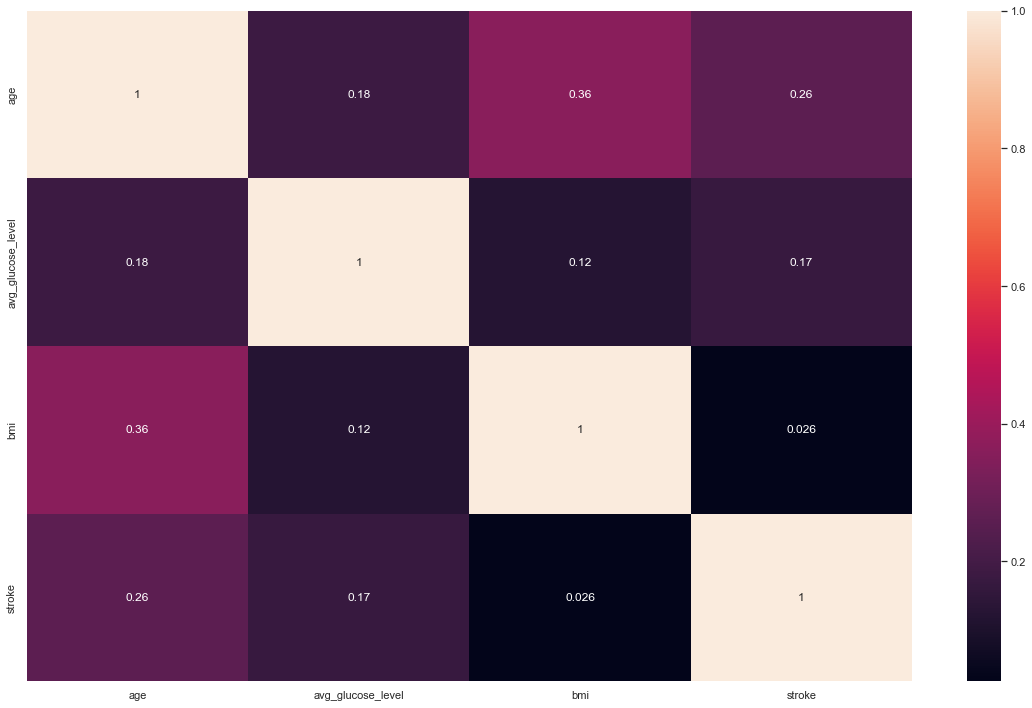

In [81]:
#heatmap to show the correlation of numerical variables
plt.figure(figsize=(16,10))
sns.heatmap(ds.corr(method='pearson'), annot=True)

## How the numerical variables are distributed

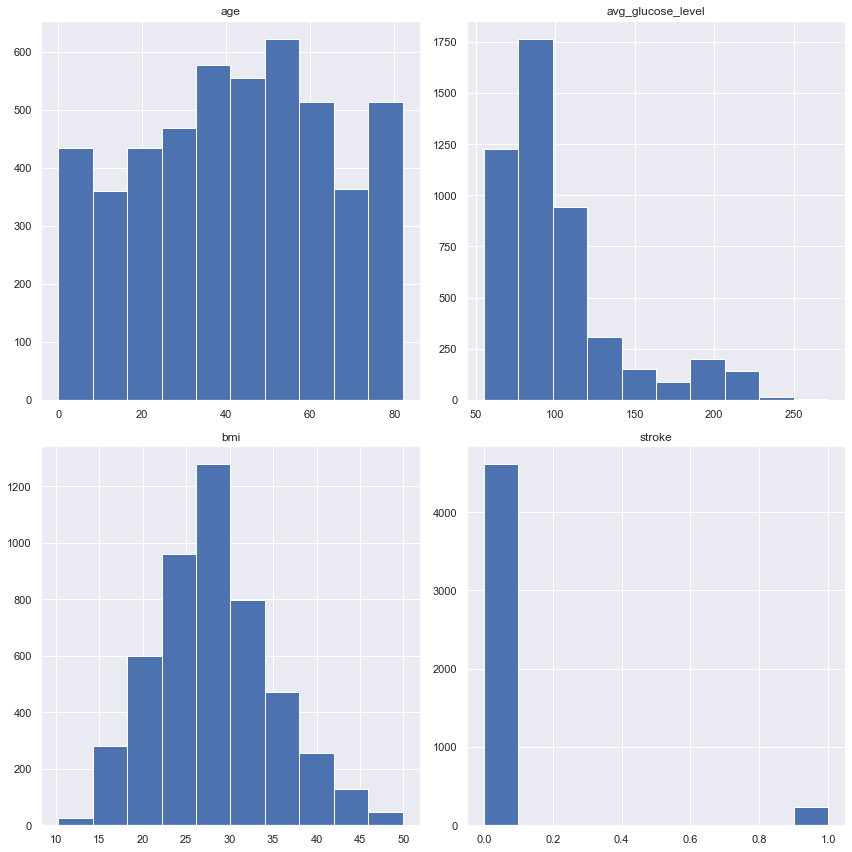

In [82]:
ds.hist(figsize=(12,12))
plt.show()

## Balancing Data

In [83]:
from sklearn.preprocessing import LabelEncoder  #encoding (we convert categorical variables into Numeric)

lb=LabelEncoder()

ds['gender'] = lb.fit_transform(ds['gender'])
ds['ever_married'] = lb.fit_transform(ds['ever_married'])
ds['work_type'] = lb.fit_transform(ds['work_type'])
ds['Residence_type'] = lb.fit_transform(ds['Residence_type'])
ds['smoking_status'] = lb.fit_transform(ds['smoking_status'])
ds['hypertension'] = lb.fit_transform(ds['hypertension'])
ds['heart_disease'] = lb.fit_transform(ds['heart_disease'])

ds.head(5)

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/2061777134.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/2061777134.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_8/q3rtfrz95rbc7w3ynvnjghgc0000gn/T/ipykernel_13996/2061777134.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             1              0             1          2   
1       0  61.0             1              1             1          3   
2       1  80.0             1              0             1          2   
3       0  49.0             1              1             1          2   
4       0  79.0             0              1             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [84]:
X = ds.drop(['stroke'], axis=1).values  #Features
y = ds['stroke'].values #target variable

In [85]:
from imblearn.over_sampling import SMOTE       # over-sampling our minority target variable
from collections import Counter

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 4610, 1: 228})
Resampled dataset shape Counter({1: 4610, 0: 4610})


In [86]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [87]:
def cross_val(model,x,cv = 10):   #Create a function for applying cross validation
    print('----------------- After cross validation -----------------')
    global y
    cv_res = cross_validate(estimator=model,X=x,y=y,n_jobs=-1,cv=cv,return_train_score = True)
    y_pred = cross_val_predict(estimator=model,X=x,y=y,n_jobs=-1,cv=cv)
    print('Training Score:',cv_res['train_score'].mean())
    print('Testing Score:',accuracy_score(y,y_pred))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap='GnBu',fmt = 'd')
    plt.title('The Confusion Matrix',color='black')
    plt.xlabel('Predicted',color='black')
    plt.ylabel('Actual',color='black')
    plt.show() 
    print(classification_report(y,y_pred))

In [88]:
from sklearn.model_selection import train_test_split #Split the matrixes into train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,shuffle=True)

/Users/rachelchong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Score: 0.7947939262472885
Testing Score: 0.7947939262472885
----------------- After cross validation -----------------


/Users/rachelchong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rachelchong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Training Score: 0.796179802362015
Testing Score: 0.7956616052060738


/Users/rachelchong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


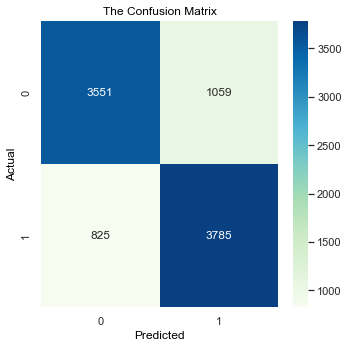

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      4610
           1       0.78      0.82      0.80      4610

    accuracy                           0.80      9220
   macro avg       0.80      0.80      0.80      9220
weighted avg       0.80      0.80      0.80      9220



In [89]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

lr_ytrain_pred = log_reg.predict(X_train)
lr_ytest_pred = log_reg.predict(X_test)

print('Training Score:',accuracy_score(y_train,lr_ytrain_pred))
print('Testing Score:',accuracy_score(y_test,lr_ytest_pred))

cross_val(LogisticRegression(),X)

In [90]:
lr_perc_score = precision_score(y_test, lr_ytest_pred)
lr_rec_score= recall_score(y_test, lr_ytest_pred)
lr_f1_score = f1_score(y_test, lr_ytest_pred)

print('------Logistic Regression-------')
print('Precision: %.3f' % lr_perc_score)
print('Recall: %.3f' % lr_rec_score)
print('F-measure: %.3f' % lr_f1_score)

------Logistic Regression-------
Precision: 0.789
Recall: 0.808
F-measure: 0.798


# Support Vector Machine (SVM)

Training Score: 0.7823571945047
Testing Score: 0.7778741865509762
----------------- After cross validation -----------------
Training Score: 0.7857194504699927
Testing Score: 0.7851409978308026


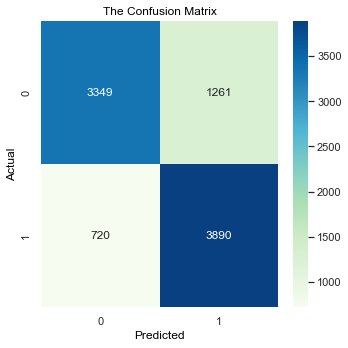

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4610
           1       0.76      0.84      0.80      4610

    accuracy                           0.79      9220
   macro avg       0.79      0.79      0.78      9220
weighted avg       0.79      0.79      0.78      9220



In [91]:
from sklearn.svm import SVC

svc=SVC(probability = True) 
svc.fit(X_train,y_train)


svc_ytrain_pred = svc.predict(X_train)
svc_ytest_pred = svc.predict(X_test)

print('Training Score:',accuracy_score(y_train,svc_ytrain_pred))
print('Testing Score:',accuracy_score(y_test,svc_ytest_pred))

cross_val(SVC(), X)

In [92]:
svc_accr_score =  accuracy_score(y_test,svc_ytest_pred)
svc_perc_score = precision_score(y_test, svc_ytest_pred)
svc_rec_score= recall_score(y_test, svc_ytest_pred)
svc_f1_score = f1_score(y_test, svc_ytest_pred)

print('--------------SVM (No GridSearch)---------------')
print('Accuracy: %.3f' % svc_accr_score)
print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

--------------SVM (No GridSearch)---------------
Accuracy: 0.778
Precision: 0.753
Recall: 0.830
F-measure: 0.790


In [93]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(probability = True), param_grid, 
                    cv = 5, scoring = "accuracy", 
                    verbose = 1, n_jobs = -1)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [94]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1, probability=True)


In [95]:
grid_svc_ytest_pred = grid.predict(X_test)

In [96]:
grid_svc_accr_score = accuracy_score(y_test, grid_svc_ytest_pred)
grid_svc_perc_score = precision_score(y_test, grid_svc_ytest_pred)
grid_svc_rec_score= recall_score(y_test, grid_svc_ytest_pred)
grid_svc_f1_score = f1_score(y_test, grid_svc_ytest_pred)

print('--------------SVM (With GridSearch)---------------')
print('Accuracy: %.3f' % grid_svc_accr_score)
print('Precision: %.3f' % grid_svc_perc_score)
print('Recall: %.3f' % grid_svc_rec_score)
print('F-measure: %.3f' % grid_svc_f1_score)

--------------SVM (With GridSearch)---------------
Accuracy: 0.958
Precision: 0.937
Recall: 0.982
F-measure: 0.959


# Decision Tree

Training Score: 1.0
Testing Score: 0.9479392624728851
----------------- After cross validation -----------------
Training Score: 1.0
Testing Score: 0.9484815618221258


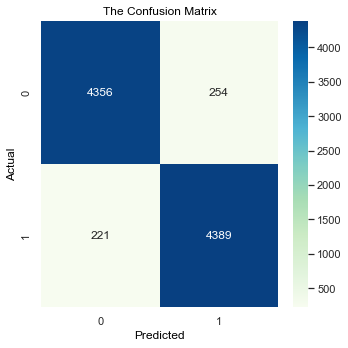

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4610
           1       0.95      0.95      0.95      4610

    accuracy                           0.95      9220
   macro avg       0.95      0.95      0.95      9220
weighted avg       0.95      0.95      0.95      9220



In [97]:
from sklearn.tree import DecisionTreeClassifier 

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

dt_ytrain_pred = model_DT.predict(X_train)
dt_ytest_pred = model_DT.predict(X_test)

print('Training Score:',accuracy_score(y_train,dt_ytrain_pred))
print('Testing Score:',accuracy_score(y_test,dt_ytest_pred))

cross_val(DecisionTreeClassifier(),X)

In [98]:
dt_accr_score =  accuracy_score(y_test,dt_ytest_pred)
dt_perc_score = precision_score(y_test, dt_ytest_pred)
dt_rec_score= recall_score(y_test, dt_ytest_pred)
dt_f1_score = f1_score(y_test, dt_ytest_pred)

print('--------------Decision Tree (No GridSearch)---------------')
print('Accuracy: %.3f' % svc_accr_score)
print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

--------------Decision Tree (No GridSearch)---------------
Accuracy: 0.778
Precision: 0.753
Recall: 0.830
F-measure: 0.790


In [99]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'criterion' : ['gini', 'entropy'],
                'max_depth' : [2,4,6,8,10,12]} 
  
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    cv = 5, scoring = "accuracy", 
                    verbose = 1, n_jobs = -1)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='accuracy', verbose=1)

In [100]:
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=12)


In [101]:
grid_dt_ytest_pred = grid.predict(X_test)

In [102]:
grid_dt_accr_score = accuracy_score(y_test, grid_dt_ytest_pred)
grid_dt_perc_score = precision_score(y_test, grid_dt_ytest_pred)
grid_dt_rec_score= recall_score(y_test, grid_dt_ytest_pred)
grid_dt_f1_score = f1_score(y_test, grid_dt_ytest_pred)

print('--------------Decision Tree (With GridSearch)---------------')
print('Accuracy: %.3f' % grid_dt_accr_score)
print('Precision: %.3f' % grid_dt_perc_score)
print('Recall: %.3f' % grid_dt_rec_score)
print('F-measure: %.3f' % grid_dt_f1_score)

--------------Decision Tree (With GridSearch)---------------
Accuracy: 0.949
Precision: 0.951
Recall: 0.948
F-measure: 0.949


In [103]:
data = tree.export_graphviz(model_DT, out_file = None, filled = True, rounded = True,
                            feature_names = ['age', 'hypertension','heart_disease','avg_glucose_level','bmi','genderCode',
                                            'ever_marriedCode','work_typeCode','Residence_typeCode', 'smoking_statusCode'],
                                            class_names = ['yes', 'no'])

graph = pydotplus.graph_from_dot_data(data)
display(Image(graph.create_png()))

In [104]:
predictions = model_DT.predict(X_test)
wrong_pred = (y_test != predictions).sum()
print ("Total wrongly detected = {}".format(wrong_pred))

accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy of this model = {:.3f}".format(accuracy))

#show the total wrongly detected data
#show the accuracy of this model

Total wrongly detected = 120
Accuracy of this model = 0.948


# K-Nearest Neighbors (KNN)

Training Score: 0.9262472885032538
Testing Score: 0.9071583514099784
----------------- After cross validation -----------------
Training Score: 0.8473126054470956
Testing Score: 0.8433839479392625


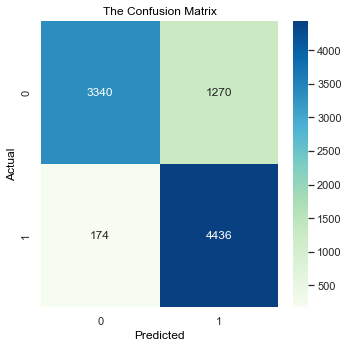

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      4610
           1       0.78      0.96      0.86      4610

    accuracy                           0.84      9220
   macro avg       0.86      0.84      0.84      9220
weighted avg       0.86      0.84      0.84      9220



In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_ytrain_pred = knn.predict(X_train)
knn_ytest_pred = knn.predict(X_test)

print('Training Score:',accuracy_score(y_train,knn_ytrain_pred))
print('Testing Score:',accuracy_score(y_test,knn_ytest_pred))

cross_val(KNeighborsClassifier(n_neighbors=50),X)

In [106]:
knn_accr_score =  accuracy_score(y_test,knn_ytest_pred)
knn_perc_score = precision_score(y_test, knn_ytest_pred)
knn_rec_score= recall_score(y_test, knn_ytest_pred)
knn_f1_score = f1_score(y_test, knn_ytest_pred)

print('--------------K-Nearest Neighbors (No GridSearch)---------------')
print('Accuracy: %.3f' % knn_accr_score)
print('Precision: %.3f' % knn_perc_score)
print('Recall: %.3f' % knn_rec_score)
print('F-measure: %.3f' % knn_f1_score)

--------------K-Nearest Neighbors (No GridSearch)---------------
Accuracy: 0.907
Precision: 0.849
Recall: 0.992
F-measure: 0.915


In [107]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, 
                    cv = 5, scoring = "accuracy", 
                    verbose = 1, n_jobs = -1)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

In [108]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9279826464208243
{'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)


In [109]:
grid_knn_ytest_pred = grid.predict(X_test)

In [110]:
grid_knn_accr_score = accuracy_score(y_test, grid_knn_ytest_pred)
grid_knn_perc_score = precision_score(y_test, grid_knn_ytest_pred)
grid_knn_rec_score= recall_score(y_test, grid_knn_ytest_pred)
grid_knn_f1_score = f1_score(y_test, grid_knn_ytest_pred)

print('--------------K-Nearest Neighbors (With GridSearch)---------------')
print('Accuracy: %.3f' % grid_knn_accr_score)
print('Precision: %.3f' % grid_knn_perc_score)
print('Recall: %.3f' % grid_knn_rec_score)
print('F-measure: %.3f' % grid_knn_f1_score)

--------------K-Nearest Neighbors (With GridSearch)---------------
Accuracy: 0.935
Precision: 0.909
Recall: 0.969
F-measure: 0.938


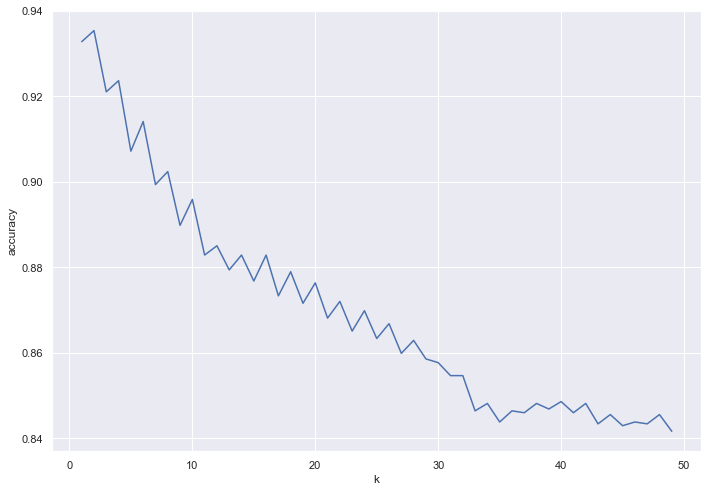

In [111]:
#To run KNN with k values in range 1 to 50
#Plot graph and see which k value give the best performance
k_range = list(range(1, 50))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

# Random Forest

Accuracy (Training Data): 1.0
Accuracy (Testing Data): 0.9735357917570499
----------------- After cross validation -----------------
Training Score: 1.0
Testing Score: 0.9739696312364425


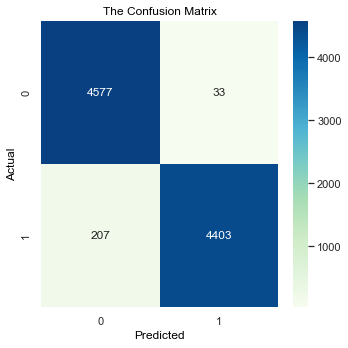

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4610
           1       0.99      0.96      0.97      4610

    accuracy                           0.97      9220
   macro avg       0.97      0.97      0.97      9220
weighted avg       0.97      0.97      0.97      9220



In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_ytrain_pred = rf.predict(X_train)
rf_ytest_pred = rf.predict(X_test)

print('Accuracy (Training Data):',accuracy_score(y_train,rf_ytrain_pred))
print('Accuracy (Testing Data):',accuracy_score(y_test,rf_ytest_pred))

cross_val(RandomForestClassifier(),X)

In [113]:
rf_accr_score =  accuracy_score(y_test,rf_ytest_pred)
rf_perc_score = precision_score(y_test, rf_ytest_pred)
rf_rec_score= recall_score(y_test, rf_ytest_pred)
rf_f1_score = f1_score(y_test, rf_ytest_pred)

print('--------------RandomForest (No GridSearch)---------------')
print('Accuracy: %.3f' % rf_accr_score)
print('Precision: %.3f' % rf_perc_score)
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

--------------RandomForest (No GridSearch)---------------
Accuracy: 0.974
Precision: 0.991
Recall: 0.956
F-measure: 0.973


In [114]:
param_grid_rf = { 
    'n_estimators': [5, 10,15,20,25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9,11,13],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv= 5)

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20, 25]})

In [115]:
print(CV_rfc.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators=25)


In [116]:
grid_rf_ytest_pred = CV_rfc.predict(X_test)

In [117]:
grid_rf_accr_score = accuracy_score(y_test, grid_rf_ytest_pred)
grid_rf_perc_score = precision_score(y_test, grid_rf_ytest_pred)
grid_rf_rec_score= recall_score(y_test, grid_rf_ytest_pred)
grid_rf_f1_score = f1_score(y_test, grid_rf_ytest_pred)

print('--------------RandomForest (With GridSearch)---------------')
print('Accuracy: %.3f' % grid_rf_accr_score)
print('Precision: %.3f' % grid_rf_perc_score)
print('Recall: %.3f' % grid_rf_rec_score)
print('F-measure: %.3f' % grid_rf_f1_score)

--------------RandomForest (With GridSearch)---------------
Accuracy: 0.970
Precision: 0.988
Recall: 0.952
F-measure: 0.970
